# Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

In [2]:
df = pd.read_csv('./DATA/Clean_CIA_Data.csv')

# Data Feature Preparation

### Feature | Target Preparation

In [3]:
X = df.drop("Country",axis=1)

#### Getting Dummies for the Data

In [4]:
X = pd.get_dummies(X)

In [5]:
X.head()

,Unnamed: 0,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,False,False,False,False,False,False,False,False,False,False
1,1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,False,False,True,False,False,False,False,False,False,False
2,2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,False,False,False,False,False,True,False,False,False,False
3,3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,False,False,False,False,False,False,False,True,False,False
4,4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,False,False,False,False,False,False,False,False,False,True


### Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_X

array([[-1.72474868,  0.0133285 ,  0.01855412, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-1.7095566 , -0.21730118, -0.32370888, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-1.69436451,  0.02905136,  0.97784988, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [ 1.67827877, -0.06726127, -0.04756396, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 1.69347086, -0.15081724,  0.07669798, ..., -0.31544015,
         1.82574186, -0.36514837],
       [ 1.70866294, -0.14464933, -0.12356132, ..., -0.31544015,
         1.82574186, -0.36514837]])

# Model Defintion and Training

In [13]:
from sklearn.cluster import KMeans

ssd = []

for k in range(2,200):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

### Elbow Plot

Text(0, 0.5, ' Sum of Squared Distances')

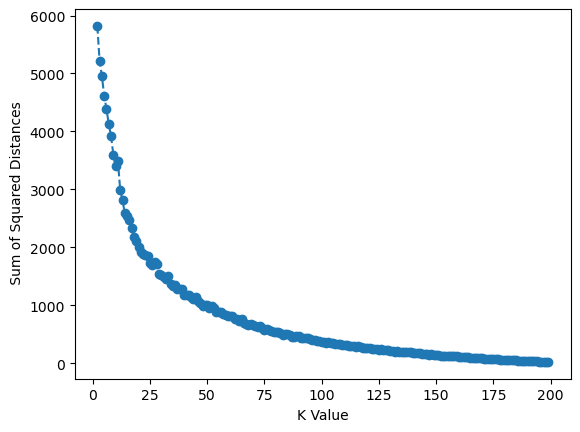

In [14]:
plt.plot(range(2,200),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

### Model Fitting at point k=100

In [15]:
model = KMeans(n_clusters=100)
model.fit(scaled_X)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=100)

In [16]:
model.labels_

array([33, 46, 64, 65, 62, 89, 87, 55, 55, 75, 55, 68,  2, 14,  0, 95, 69,
       87, 96,  2,  6, 26, 53, 18,  6, 46, 79, 74, 87, 70,  4, 26, 18, 85,
       18,  1, 12, 80, 40, 97, 26, 55,  3,  6, 85, 36, 39, 55, 26,  4, 30,
        4,  2, 43, 23, 30, 61, 64, 30, 39, 43,  7, 26, 31, 19, 31,  2, 55,
       19, 39, 26, 78, 75,  2,  1, 28, 71, 20, 23, 55, 52, 61, 26, 97,  6,
       30, 61, 15,  4, 31, 44,  5, 88, 81, 91, 31, 66, 71, 61, 24, 31,  9,
       17, 43, 84, 35, 24, 38, 75, 18,  7, 92, 77, 97, 64, 91, 99, 51, 27,
       82, 43, 26, 54, 67, 36, 71, 16,  0, 43, 72, 32, 61, 10, 37, 88, 29,
        8, 13, 34, 41, 18, 71,  0, 19, 19, 61, 36, 48, 50, 51,  9, 18, 83,
       58, 11, 58, 58, 54, 76, 71, 58, 38, 45, 76, 22, 48, 63,  0, 61, 49,
       61, 56, 21, 59,  9, 43, 45, 13, 90, 82, 82, 11, 36, 34, 71, 54, 43,
       58, 77, 51, 51, 92, 24, 47, 36, 35, 48, 16, 98, 93, 25, 47, 86, 11,
       48, 37, 73, 51, 57, 58, 47, 11, 58, 35,  0, 42, 25, 60,  9, 94, 94])

In [18]:
X['K=100 Clusters'] = model.labels_

X.corr()['K=100 Clusters'].sort_values()

Region_OCEANIA                               -0.109944
Population                                   -0.096475
Region_ASIA (EX. NEAR EAST)                  -0.081558
Area (sq. mi.)                               -0.067338
Agriculture                                  -0.054726
Other (%)                                    -0.047112
Service                                      -0.041439
Region_NORTHERN AMERICA                      -0.036239
Birthrate                                    -0.033294
Coastline (coast/area ratio)                 -0.031772
Region_BALTICS                               -0.030205
GDP ($ per capita)                           -0.024814
Phones (per 1000)                            -0.013130
Region_WESTERN EUROPE                        -0.012883
Infant mortality (per 1000 births)           -0.003056
Pop. Density (per sq. mi.)                    0.001967
Region_EASTERN EUROPE                         0.010080
Region_LATIN AMER. & CARIB                    0.016984
Deathrate 

## Saving the Model as a .pkl File:

In [21]:
import pickle

filename = './Models/knn_clustered_model.pkl'
pickle.dump(model, open(filename, 'wb'))